In [1]:
import sys
path = '/Users/Everwitt/Documents/Pitch-Prediction/pitcherprediction'
sys.path.append(path)

In [2]:
import pandas as pd
import numpy as np

#importing path to obvious_zones allows us to import
from obvious_zones import *

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# These values are actually based on the universal strike zone values
RIGHT = 0.831
TOP = 1.074
obv_zones = ObviousZones(RIGHT, TOP)

In [4]:
print(obv_zones)

Cutoff Coordinates= > left_x: -0.831, right_x: 0.831top_y: 1.074, bot_y: -1.074


In [5]:
p = pd.read_csv('./obv_zone_cutoff.csv')

In [6]:
p['obv_zone'].value_counts()

12b    420117
15b    416363
13b    389123
16b    179081
10b    140269
14b     94646
9b      47673
11b     24377
Name: obv_zone, dtype: int64

In [7]:
p['pitch_type'].value_counts()

FF    560352
FT    335452
SL    322500
CH    225681
CU    168828
FC     98836
Name: pitch_type, dtype: int64

In [8]:
p.shape

(1711649, 16)

In [9]:
# For Each Pitch
ff = p.loc[p['pitch_type'] == 'FF']
ft = p.loc[p['pitch_type'] == 'FT']
fc = p.loc[p['pitch_type'] == 'FC']
sl = p.loc[p['pitch_type'] == 'SL']
ch = p.loc[p['pitch_type'] == 'CH']
cu = p.loc[p['pitch_type'] == 'CU']

# For Each Zone

# Swing/Take % -> We want like a heat map of sorts that is based on this pct

## FourSeam Fastball Zone Breakdowns

In [10]:
filt = ff['obv_zone'] == '9b'
z = ff.loc[filt, ['px', 'py', 'swing', 'obv_zone']]

<AxesSubplot:xlabel='px', ylabel='py'>

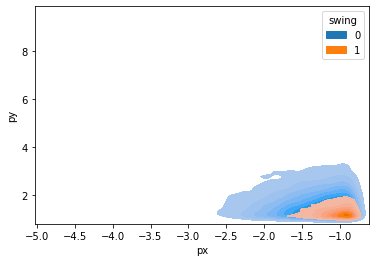

In [11]:
sns.kdeplot(
    data=z, x="px", y="py", hue="swing", fill=True,
)

In [12]:
# at every point I want df['swing'].sum()/df['swing'].count()
# what I would literally have to do is create my own density function - i increase px and py and then I calculate
# the density using the above equation, and then I would graph above based on that

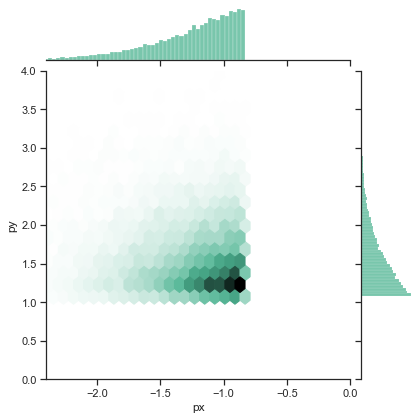

In [13]:
sns.set_theme(style="ticks")
plot = sns.jointplot(x=z['px'], y=z['py'], kind="hex", color="#4CB391")

xs = .6
ys = 1

plot.ax_marg_x.set_xlim(-4*xs, 0)
plot.ax_marg_y.set_ylim(0, 4)

plt.show()

In [14]:
# from original cleaning kaggle
x_arb = -1.2
y_arb = 1.4

# inside that square what is the %swing/take?
# filt = z['px'] < x_arb
filt = ((z['py'] < y_arb) & (z['px'] < x_arb))
zf = z.loc[filt]
znf = z.loc[~filt]

In [15]:
print(z.shape)
print(zf.shape)
print(znf.shape)

(25633, 4)
(5182, 4)
(20451, 4)


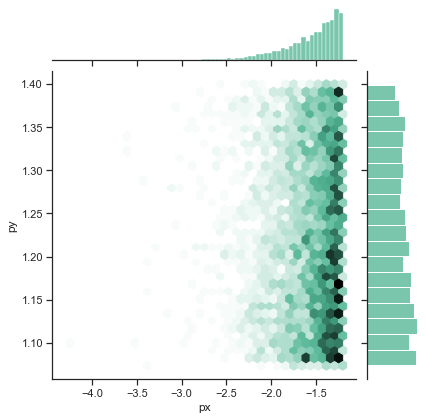

In [16]:
sns.set_theme(style="ticks")
plot = sns.jointplot(x=zf['px'], y=zf['py'], kind="hex", color="#4CB391")

# plot.ax_marg_x.set_xlim(-2, 0)
# plot.ax_marg_y.set_ylim(0, 2)

plt.show()

## How did we know our initial cutoffs were correct? 

Either my answer is crazy 5% swing rate IN OUR NON-OBVIOUS zone, or something is wrong

In [17]:
x_arb = [-0.831 - .09*x for x in range(6)]
y_arb = [1.074 + .1*x for x in range(6)]
x_arb.pop(0)
y_arb.pop(0)

1.074

In [18]:
print(z.shape)
for x,y in zip(x_arb, y_arb):
    filt = (z['py'] < y) & (z['px'] < x)
    zf = z.loc[filt, 'swing']
    znf = z.loc[~filt, 'swing']

    print(f"Coordinates: ({x,y})")
    print(f"Num Pitches in Ball Zone: {zf.shape[0]}")
    print(f"Num Pitches in Obv Zone: {znf.shape[0]}")
    
    print("Non-Obv Ball Zones")
    print(f"Num Swings: {zf.sum()}")
    print(f"Num Takes : {zf.count()-zf.sum()}")
    print(f"Swing%: {zf.sum()/zf.count()}")
    print(f"Take%: {1 - zf.sum()/zf.count()}")
    print()

(25633, 4)
Coordinates: ((-0.9209999999999999, 1.1740000000000002))
Num Pitches in Ball Zone: 3420
Num Pitches in Obv Zone: 22213
Non-Obv Ball Zones
Num Swings: 452
Num Takes : 2968
Swing%: 0.13216374269005848
Take%: 0.8678362573099415

Coordinates: ((-1.011, 1.274))
Num Pitches in Ball Zone: 5339
Num Pitches in Obv Zone: 20294
Non-Obv Ball Zones
Num Swings: 523
Num Takes : 4816
Swing%: 0.09795841917962166
Take%: 0.9020415808203783

Coordinates: ((-1.101, 1.374))
Num Pitches in Ball Zone: 6180
Num Pitches in Obv Zone: 19453
Non-Obv Ball Zones
Num Swings: 427
Num Takes : 5753
Swing%: 0.06909385113268608
Take%: 0.9309061488673139

Coordinates: ((-1.1909999999999998, 1.4740000000000002))
Num Pitches in Ball Zone: 6272
Num Pitches in Obv Zone: 19361
Non-Obv Ball Zones
Num Swings: 325
Num Takes : 5947
Swing%: 0.05181760204081633
Take%: 0.9481823979591837

Coordinates: ((-1.281, 1.574))
Num Pitches in Ball Zone: 5851
Num Pitches in Obv Zone: 19782
Non-Obv Ball Zones
Num Swings: 205
Num Takes

In [19]:
# look at min and max values of px py
z.describe()

,px,py,swing
count,25633.000000,25633.000000,25633.000000
mean,-1.277994,1.585997,0.078727
std,0.382277,0.461665,0.269317
min,-4.811587,1.074062,0.000000
25%,-1.468187,1.240896,0.000000
50%,-1.180000,1.457000,0.000000
75%,-0.990000,1.802000,0.000000
max,-0.831038,9.611000,1.000000


In [20]:
# max px and min py are correct... (this is actually a good way to check to make sure zones are working???)
# I mean in this entire zone we have 7.8% swing - which is actually fine, we are hoping to split this to get 
# two different zones, one with like 30+% swing

#i just do not understand how the last one can have less pitches in the non-obvious zone even though
#it has a bigger rectangle... the first is a subrectangle of the second but has more pitches!?!?